In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

palette = ["#e072b5",
"#69b15f",
"#737df6",
"#c79737",
"#b67ae4",
"#e57368",
"#799ddb"]

In [3]:
df = pd.read_csv("../Data/NetworkStats/networkStats_byMonth_updated.csv")

#Go through Dec 31 2019 to fit patent data
#df = df[df["month"] > "2020-01"]

new_cpd_count = pickle.load(open("../Data/NetworkStats/new_cpd_count.p", "rb"))

patent_df = pd.read_csv("../Data/NetworkStats/patent_stats_updated.csv")

#patent_avg_degree_df = pd.read_csv("../Data/NetworkStats/patent_avg_degree.csv")

# #Edit patents to fit 1980-2020 range
# patent_df = patent_df[patent_df["month"] >= "1980-01"]
# patent_df = patent_df[patent_df["month"] < "2020-01"]

# #Sort avg degree df, and add it to patent_df
# patent_avg_degree_df = patent_avg_degree_df.sort_values("month")
# patent_df["AvgPatentDegree"] = patent_avg_degree_df["AvgDegree"].tolist()

print(df.head())
print("-------------------------------------")
#print(lcc_df.head())
print("-------------------------------------")
print(patent_df.head())

   Unnamed: 0  Unnamed: 0.1    Nodes    Edges  Cpd Nodes  Patent Nodes  \
0           0             0  5177987   353266      41794       5136193   
1           0             0  5189241   482418      53048       5136193   
2           0             0  5205466   695940      69273       5136193   
3           0             0  5226781  1089484      90588       5136193   
4           0             0  5248174  1406193     111981       5136193   

   Avg Degree  Cpd Avg Degree  Patent Avg Degree  LCC Size    month  
0    0.136449        8.452553           0.068780    150356  1976-01  
1    0.185930        9.093990           0.093925    212702  1976-02  
2    0.267388       10.046338           0.135497    323555  1976-03  
3    0.416885       12.026803           0.212119    543397  1976-04  
4    0.535879       12.557425           0.273781    707481  1976-05  
-------------------------------------
-------------------------------------
   Unnamed: 0    month  total_patents  new_patents  avg_deg

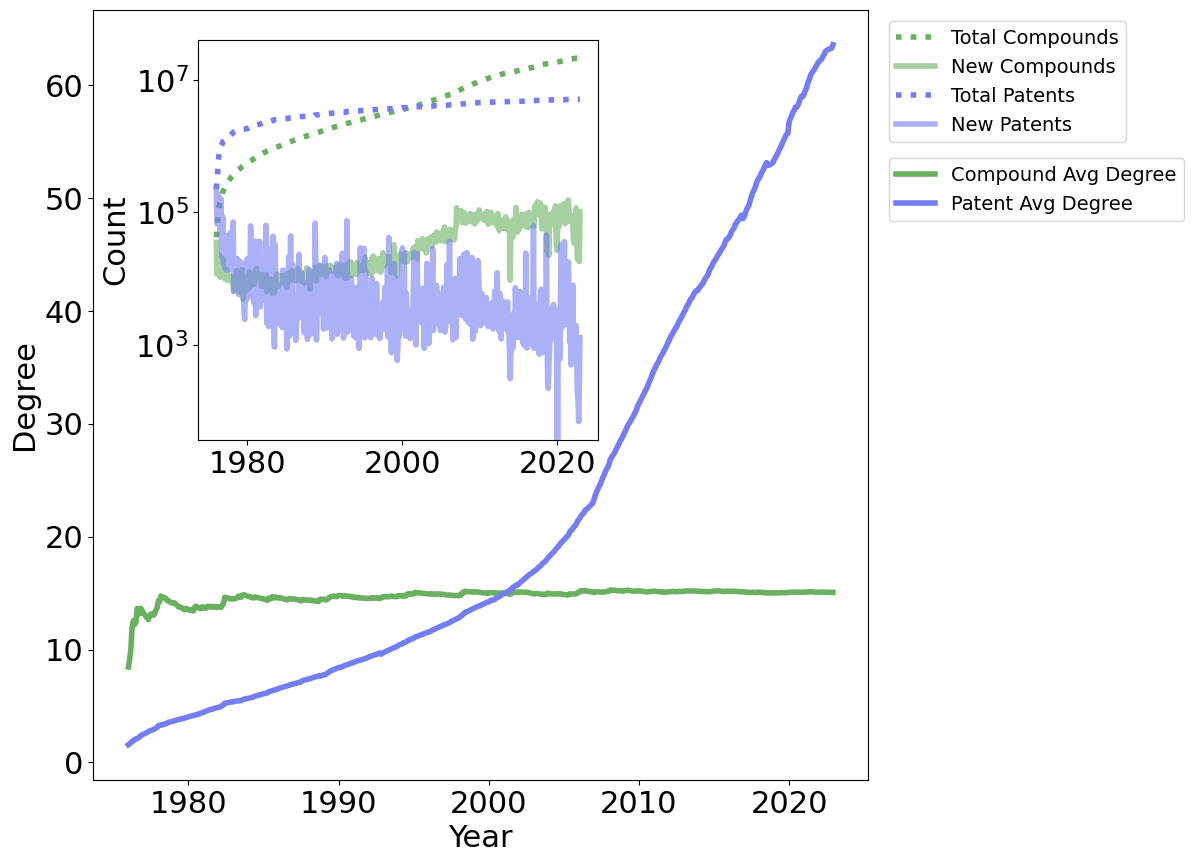

In [17]:
fig, ax1 = plt.subplots(figsize=(10,10))

xs = list(np.arange(1976, 2023, 1/12))

ln1 = ax1.plot(xs, df["Cpd Avg Degree"], linewidth=4, label="Compound Avg Degree", 
               color=palette[1])
ln6 = ax1.plot(xs, patent_df["avg_degree"], linewidth=4, label="Patent Avg Degree", 
               color=palette[2])

#ax2 = ax1.twinx()
ax2 = fig.add_axes([0.23, 0.45, 0.4, 0.4]) #left, bottom, width, height coordinates
ln2 = ax2.plot(xs, df["Cpd Nodes"], linewidth=4, label="Total Compounds", color=palette[1],
              linestyle="dotted",)
ln3 = ax2.plot(xs, new_cpd_count, linewidth=4, label="New Compounds", color=palette[1], alpha=0.6)

ln4 = ax2.plot(xs, patent_df["total_patents"], linewidth=4, label="Total Patents", 
               linestyle="dotted", color=palette[2])
ln5 = ax2.plot(xs, patent_df["new_patents"].tolist(), linewidth=4, label="New Patents", 
                color=palette[2], alpha=0.6)

ax2.set_yscale("log")

# lns = ln2 + ln3 + ln4 + ln5 + ln1 + ln6
# labels = [l.get_label() for l in lns]
# ax1.legend(lns, labels, prop={"size":14}, bbox_to_anchor=(1.5, 1.02))
ax1.legend(prop={"size":14}, bbox_to_anchor=(1.42, 0.82)) #Degrees
ax2.legend(prop={"size":14}, bbox_to_anchor=(2.345, 1.07)) #Total/new compounds

ax1.set_xlabel("Year")
ax1.set_ylabel("Degree")
ax2.set_ylabel("Count")

plt.show()

Defense figures

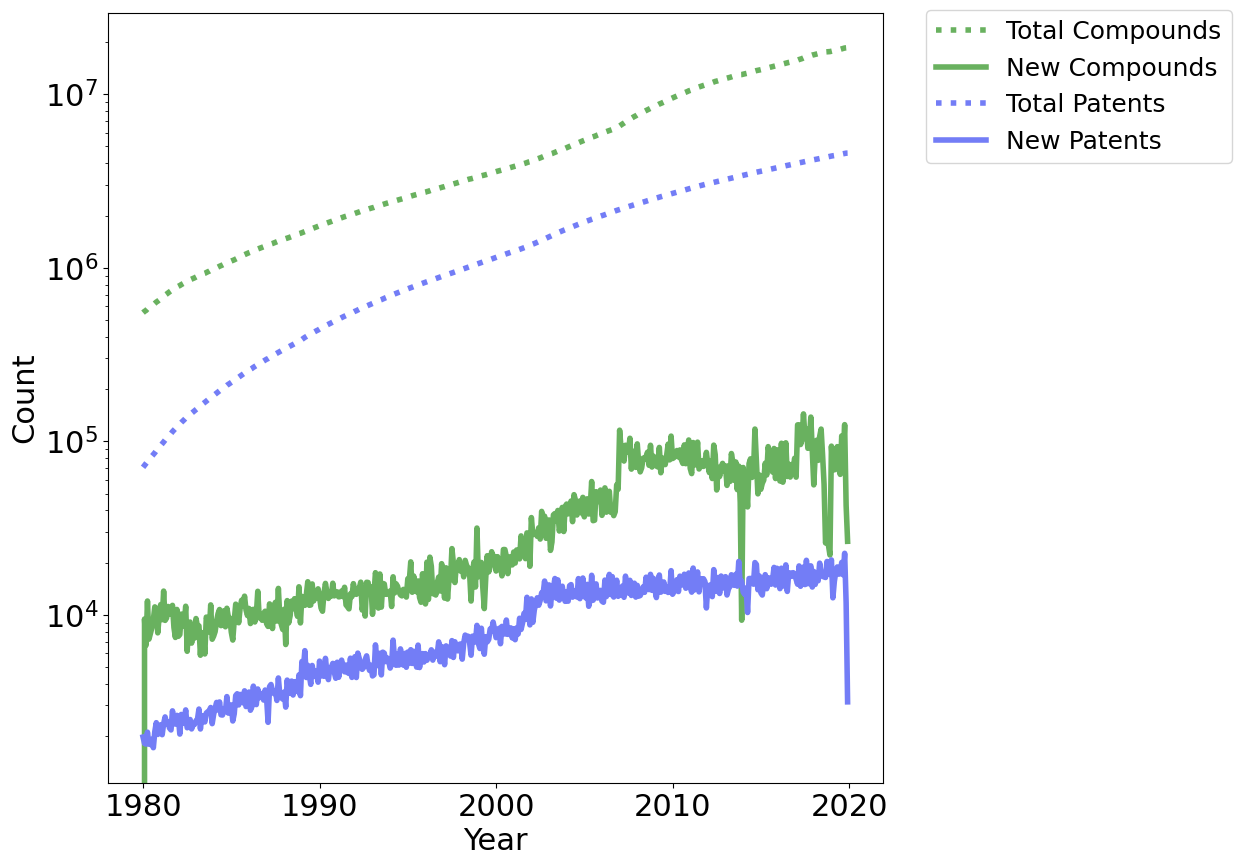

In [15]:
### Total & New compounds
fig, ax2 = plt.subplots(figsize=(10,10))

ln2 = ax2.plot(xs, df["Cpd Nodes"], linewidth=4, label="Total Compounds", color=palette[1],
              linestyle="dotted",)
ln3 = ax2.plot(xs, lcc_df["newIds"].tolist(), linewidth=4, label="New Compounds", color=palette[1])

ln4 = ax2.plot(xs, patent_df["totalPatents"], linewidth=4, label="Total Patents", 
               linestyle="dotted", color=palette[2])
ln5 = ax2.plot(xs, patent_df["newPatents"].tolist(), linewidth=4, label="New Patents", 
                color=palette[2])

ax2.set_ylabel("Count")
ax2.set_xlabel("Year")

ax2.set_yscale("log")
ax2.legend(prop={"size":18}, bbox_to_anchor=(1.04, 1.02))

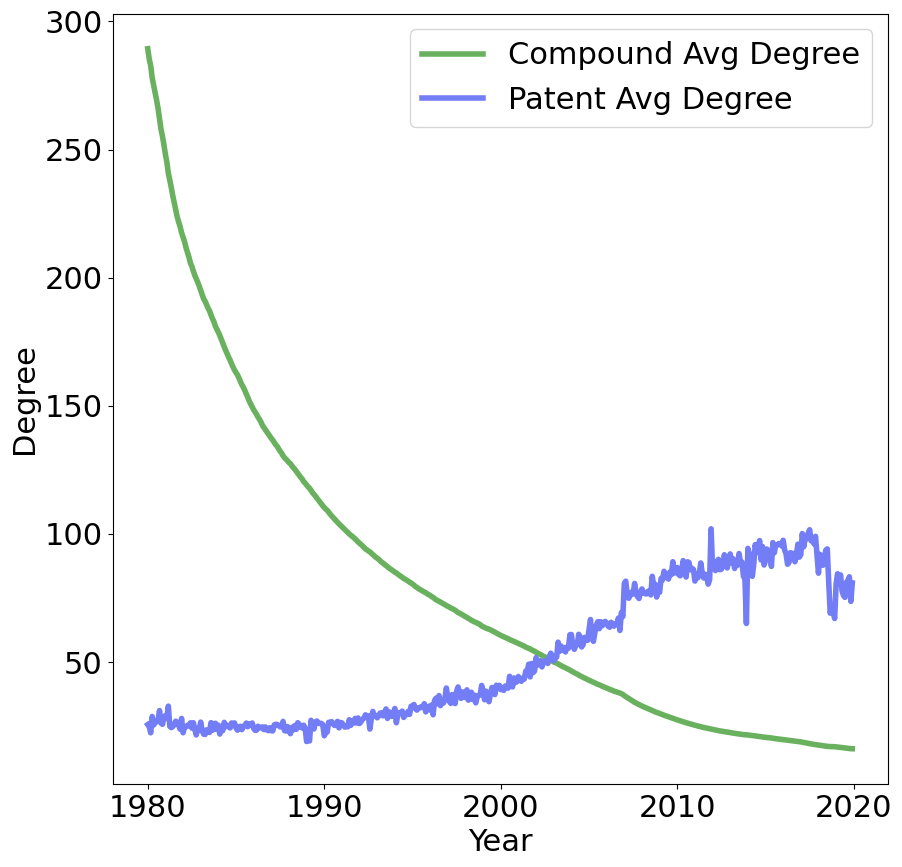

In [19]:
### Basic network statistics over time
fig, ax1 = plt.subplots(figsize=(10,10))

xs = list(np.arange(1980, 2020, 1/12))

ln1 = ax1.plot(xs, df["Cpd Avg Degree"], linewidth=4, label="Compound Avg Degree", 
               color=palette[1])
ln6 = ax1.plot(xs, patent_df["AvgPatentDegree"], linewidth=4, label="Patent Avg Degree", 
               color=palette[2])

ax1.set_ylabel("Degree")
ax1.set_xlabel("Year")

ax1.legend()